### 1. Loading Libraries

In [31]:
# Computation
import numpy as np
import pandas as pd 

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Statistics
from scipy.stats import shapiro
import scipy.stats as stats

# Utils
import warnings
import os

%matplotlib inline

In [32]:
mpl.style.use("fivethirtyeight")

### 2. Loading Data

In [33]:
df = pd.read_csv('../data/final_df.csv')

In [4]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,1
2,377,gate_40,165,1,1
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
...,...,...,...,...,...
90183,9999441,gate_40,97,1,1
90184,9999479,gate_40,30,0,0
90185,9999710,gate_30,28,1,1
90186,9999768,gate_40,51,1,1


### 3. Bootstrapping for `retention_1d`

#### 3A. Looking at `retention_1d` between `gate_30` and `gate_40`.

`retention_1` is a flag indicating whethere a user will go back and play the game one day after he or she installed it. It is an important metrics indicating user engagement and retention.

1. The overall 1-day retention is 44.52%.
2. 1-day retention of `gate_30` is 44.82% and 1-day retention of `gate_40` is 44.23%, which is not very different from each other.

In [7]:
df['retention_1'].mean()

0.4452144409455803

In [6]:
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

#### 3B. Bootstrapping for `retention_1d`

While the difference in `retention_1d` between `gate_30` and `gate_40` is very small, it can make a big difference when we look at millions of players if the game is grow in the future.

I would like to understand whether the difference is significant. In this notebook, I will use bootstrapping: I will re-sample the dataset with replacement for 10,000 times, and calculate 1-day retention for those samples.

This will give me an idea of how confident I should be about the difference between `gate_30` and `gate_40` - the procedure will give us an idea of how uncertain the numbers are.

After bootstrapping, it seems like moving from `gate_30` to `gate_40` has an impact on 1-day retention. The rationale is unclear, and depends on questions like whether a player knows in advance there will be a gate in front of them. 

In [15]:
# Creating an list with bootstrapped means for each AB-group
bs_1d = []

for i in range(10000):
    
    # Here, we allow sample rows more than once, by setting replace=True
    # And make sure in every sample, the size is equal to the original size
    # by setting frac = 1
    bs_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    bs_1d.append(bs_mean)

<AxesSubplot:ylabel='Density'>

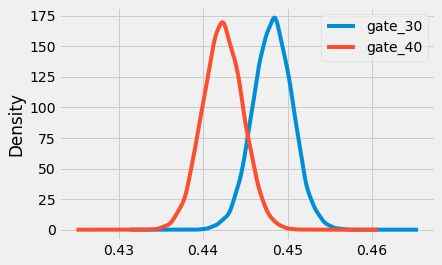

In [16]:
bs_1d_df = pd.DataFrame(bs_1d, columns=['gate_30', 'gate_40'])
bs_1d_df.plot(kind = 'kde')

#### 3C. Understanding the Difference

Looking at the percentage difference plot, we can see that there seems to be evidence for a difference.

<AxesSubplot:ylabel='Density'>

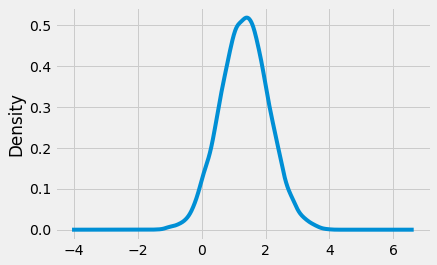

In [17]:
bs_1d_df['diff'] = ((bs_1d_df['gate_30'] - bs_1d_df['gate_40'])/bs_1d_df['gate_40'])* 100

# Plotting the bootstrapping % difference
bs_1d_df['diff'].plot(kind='kde')


In [26]:
print('The probability that 1-day retention is greater when the gate is at level 30 is {}%.'.format((bs_1d_df['diff'] > 0).mean()*100))

The probability that 1-day retention is greater when the gate is at level 30 is 96.23%.


### 4. Bootstrapping for `retention_7d`

#### 4A. Looking at `retention_7d` between `gate_30` and `gate_40`

The difference seems to be bigger between the control and treatment for `retention_7`.

In [35]:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

In [34]:
df['retention_7'].mean()

0.1860557945624695

#### 4B. Bootstrapping for `retention_7d`

In [36]:
bs_7d = []

for i in range(10000):
    
    # Here, we allow sample rows more than once, by setting replace=True
    # And make sure in every sample, the size is equal to the original size
    # by setting frac = 1
    bs_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    bs_7d.append(bs_mean)

<AxesSubplot:ylabel='Density'>

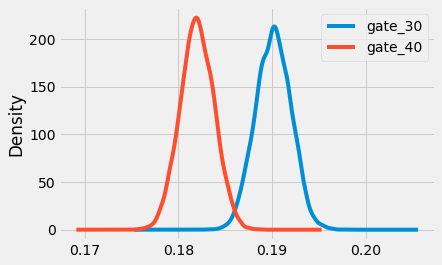

In [37]:
bs_7d_df = pd.DataFrame(bs_7d, columns=['gate_30', 'gate_40'])
bs_7d_df.plot(kind = 'kde')

#### 4C. Understanding the Difference

<AxesSubplot:ylabel='Density'>

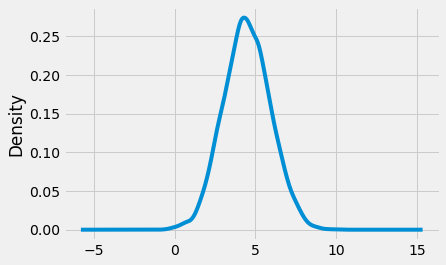

In [38]:
bs_7d_df['diff'] = ((bs_7d_df['gate_30'] - bs_7d_df['gate_40'])/bs_7d_df['gate_40'])* 100

# Plotting the bootstrapping % difference
bs_7d_df['diff'].plot(kind='kde')

In [39]:
print('The probability that 7-day retention is greater when the gate is at level 30 is {}%.'.format((bs_7d_df['diff'] > 0).mean()*100))

The probability that 7-day retention is greater when the gate is at level 30 is 99.9%.


### 5. Bootstrapping for `sum_gamerounds`

Changing from `gate_30` to `gate_40` doesn't seem to have an impact on game rounds.

In [40]:
df.groupby('version')['sum_gamerounds'].mean()

version
gate_30    51.342111
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

In [41]:
bs_gr = []

for i in range(10000):
    
    # Here, we allow sample rows more than once, by setting replace=True
    # And make sure in every sample, the size is equal to the original size
    # by setting frac = 1
    bs_mean = df.sample(frac=1, replace=True).groupby('version')['sum_gamerounds'].mean()
    bs_gr.append(bs_mean)

<AxesSubplot:ylabel='Density'>

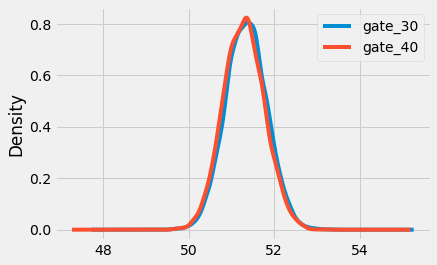

In [42]:
bs_gr_df = pd.DataFrame(bs_gr, columns=['gate_30', 'gate_40'])
bs_gr_df.plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

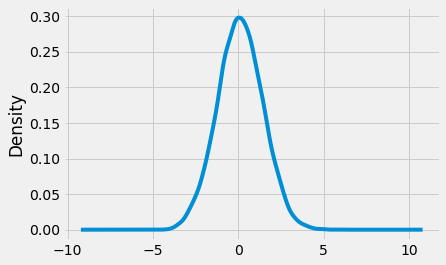

In [43]:
bs_gr_df['diff'] = ((bs_gr_df['gate_30'] - bs_gr_df['gate_40'])/bs_gr_df['gate_40'])* 100

# Plotting the bootstrapping % difference
bs_gr_df['diff'].plot(kind='kde')

In [44]:
print('The probability that mean of game rounds is greater when the gate is at level 30 is {}%.'.format((bs_gr_df['diff'] > 0).mean()*100))

The probability that mean of game rounds is greater when the gate is at level 30 is 53.059999999999995%.
